# Pandas

## Statistical Data Processing and Vectorized Operations

In this notebook, we'll explore:

- **Statistical Data Generation**: Creating realistic datasets with controlled statistical properties
- **DataFrame Operations**: Efficient data structures for heterogeneous data processing
- **Vectorized Computing**: Leveraging pandas' optimized operations for maximum performance
- **Memory-Efficient Workflows**: Best practices for handling large datasets
- **Visualization Integration**: Built-in plotting capabilities for rapid data exploration

### Why Pandas for High Performance Data Analysis?

Pandas excels in HPDA scenarios because it:

1. **Combines NumPy speed with data convenience** - vectorized operations on structured data
2. **Handles mixed data types efficiently** - numerical, categorical, temporal data in one structure
3. **Provides optimized I/O operations** - reading/writing large datasets from various formats
4. **Integrates seamlessly with visualization** - built-in plotting reduces data movement overhead
5. **Offers memory-efficient operations** - lazy evaluation and chunking capabilities

### Learning Objectives

By the end of this tutorial, you'll understand:
- How to generate and manipulate large statistical datasets efficiently
- When pandas operations are vectorized vs when they create performance bottlenecks
- Memory considerations when scaling to larger datasets
- Best practices for data exploration and visualization in HPDA workflows

Let's start with practical examples!

In [1]:
import psutil
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [8]:
# print amount of available RAM memory
print(f"Available RAM: {psutil.virtual_memory().available / (1024 ** 3):.2f} GB")

Available RAM: 7.95 GB


## Creating Distance and Time Measurements

Let's simulate a physics experiment measuring distances and time with some measurement uncertainty.

**Key Parameters:**
- **Sample size**: 1,000 measurements (small enough for fast computation)
- **Distance**: 100 meters with 10% measurements uncertainty
- **Time**: 10 seconds with 1%  measurements uncertainty, uncorrelated with distance

This represents a realistic scenario in experimental physics or sensor data collection.

In [9]:
n_samples = 100_000_000
distance_mean_m = 100
distance_sigma_m = 10

# draw samples from a normal distribution
distance_samples_m = np.random.normal(loc=distance_mean_m, scale=distance_sigma_m, size=n_samples)

In [10]:
time_mean_s = 10
time_sigma_s = 2

time_samples_s = np.random.normal(loc=time_mean_s, scale=time_sigma_s, size=n_samples)

## Pandas DataFrame

### From NumPy Arrays to Structured Data

While NumPy excels at homogeneous numerical data, pandas DataFrames provide:

- **Column-based organization**: Named columns with different data types
- **Index support**: Efficient row selection and joining operations  
- **Metadata handling**: Column names, data types, and missing value support
- **Memory efficiency**: Columnar storage optimized for analytical operations

In [11]:
df = pd.DataFrame(
    {
        "distance_m" : distance_samples_m,
        "time_s": time_samples_s
    }
)

## Efficient Data Exploration

### Quick Data Inspection with .head()

The `head()` method is essential for efficient data exploration, especially with large datasets:

- **Fast execution**: Only processes/displays the first few rows regardless of dataset size
- **Structure validation**: Quickly verify column names, data types, and general data quality
- **Memory efficient**: Doesn't load entire dataset into display buffer

**HPDA Best Practice**: Always use `head()`, `tail()`, or `sample()` instead of printing entire DataFrames when working with large datasets.

In [49]:
df.head()

,distance_m,time_s
0,102.150195,10.193098
1,98.130645,10.982201
2,107.088053,9.392860
3,98.748032,8.412370
4,95.193022,13.490220


### Integrated Visualization with pandas.plot

Pandas provides built-in plotting capabilities that offer several advantages for HPDA:

- **Zero data copying**: Plots directly from DataFrame without transferring data
- **Automatic labeling**: Uses column names and index for axis labels
- **Performance optimized**: Leverages matplotlib's C extensions efficiently
- **Memory efficient**: No intermediate data structures for simple plots

**When to use pandas.plot vs matplotlib directly:**
- **pandas.plot**: Quick exploration, standard statistical plots, automatic formatting
- **matplotlib**: Complex customization, subplots, publication-quality figures

Let's create a scatter plot to explore the relationship between our variables:

<Axes: xlabel='time [s]', ylabel='distance [m]'>

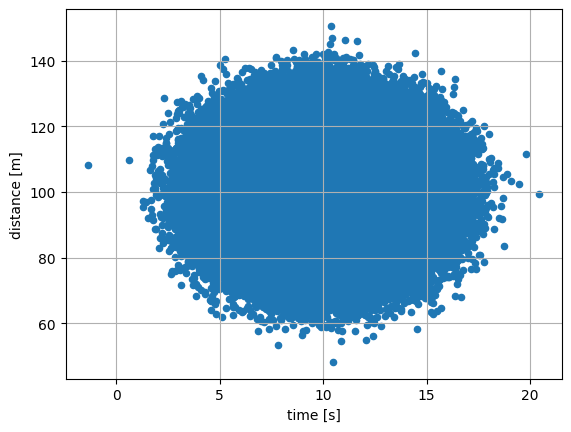

In [50]:
df.plot.scatter("time_s", "distance_m", xlabel="time [s]", ylabel="distance [m]", grid=True)

## Vectorized Operations

### Computing Derived Variables Efficiently

One of pandas' greatest strengths is **vectorized operations** - applying computations to entire columns without explicit loops. This creates a new column by computing speed from distance and time.

**Why Vectorized Operations Are Fast:**
- **No Python loops**: Operations happen at C speed in NumPy/pandas core
- **Optimized memory access**: Sequential memory access patterns optimize CPU cache usage  
- **SIMD instructions**: Modern CPUs can process multiple values simultaneously
- **Reduced interpreter overhead**: Single operation on millions of values vs millions of Python function calls

In [12]:
df["speed_m_per_s"] = df.distance_m / df.time_s

### Statistical Distribution Analysis

Histograms are essential for understanding data distributions in HPDA workflows:

- **Quick distribution assessment**: Identify normal, skewed, or multi-modal distributions
- **Outlier detection**: Spot unusual values that might indicate data quality issues
- **Parameter validation**: Verify that generated data matches expected statistical properties

**Expected Result**: Since we computed speed = distance/time with both variables normally distributed, the speed distribution should be **approximately** normal

**Mathematical Insight**: The ratio of two normal distributions creates a more complex distribution, often with slightly heavier tails than a pure normal distribution.

<Axes: >

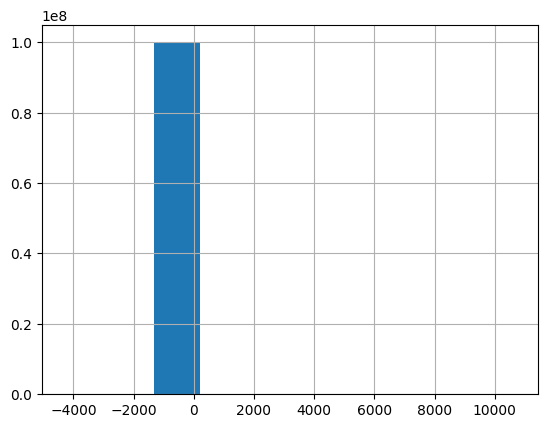

In [13]:
df.speed_m_per_s.hist()

##  Hands-On Exercises - Will Scaling reveal a mystery ?

### 🎯 **Exercise 1: Histogram Resolution Analysis**

**Challenge**: Create a histogram with much finer binning to better understand the speed distribution.

**Instructions**:
1. Use the `bins` parameter in `.hist()` to increase bin count (try 50, 100, or more)
2. Compare how the distribution shape changes with different bin sizes
3. Consider the trade-off between resolution and noise

**Learning Objective**: Understand how histogram binning affects statistical interpretation in large datasets.

### 🧪 **Exercise 2: Statistical Parameter Exploration**  

**Challenge**: Explore how different statistical parameters affect the speed distribution.

**New Parameters to Test**:
- **Distance**: ~N(100, 1) - Very precise distance measurements
- **Time**: ~N(10, 2) - Less precise time measurements  

**Instructions**:
1. Regenerate data with these new parameters
2. Compute the speed distribution and create a histogram
3. Compare with the previous distribution

**Research Questions**:
- How does the precision of input measurements affect output distributions?
- Which input variable (distance vs time) has more impact on speed uncertainty?
- Can you predict the approximate mean and standard deviation of the resulting speed?

**Advanced**: Try different parameter combinations and develop intuition for how measurement uncertainty propagates.

### 🏋️ **Exercise 3: Memory Scaling Challenge**

**Challenge**: Adjust `n_samples` to use approximately 100 million samples.

**Instructions**:
1. Check your available RAM from the output above
2. Calculate target sample size: (0.1 × RAM_GB × 1024³) ÷ (3 columns × 8 bytes per float64)
3. Update `n_samples` and regenerate your DataFrame
4. Monitor memory usage and performance impact

**Memory Calculation Example**:
- Available RAM: 8 GB
- Target usage: 0.8 GB  
- Per-sample memory: 3 columns × 8 bytes = 24 bytes
- Target samples: 0.8 GB ÷ 24 bytes ≈ 33 million samples

**Learning Objectives**:
- Practice memory capacity planning
- Observe how operations scale with data size
- Understanding memory vs computation trade-offs

## Key Takeaways for High Performance Data Analysis

### 📊 **Performance Best Practices Learned**

1. **Memory Monitoring**: Always check available resources before scaling operations
2. **Vectorized Operations**: Use pandas/NumPy operations instead of Python loops 
3. **Efficient Exploration**: Use `head()`, `sample()`, or `info()` for large dataset inspection
4. **Integrated Visualization**: Leverage pandas.plot for fast exploratory analysis
5. **Statistical Awareness**: Understand how data transformations affect distributions

### 🚀 **Scaling Considerations**

- **Memory Planning**: Calculate expected memory usage before creating large datasets
- **Chunking Strategies**: For datasets larger than RAM, consider processing in chunks
- **I/O Optimization**: Save/load DataFrames in efficient formats (Parquet, HDF5)
- **Computational Complexity**: Be aware of O(n²) vs O(n) operations as data grows

### 🎓 **Next Steps in HPDA Journey**

- **Dask Integration**: Scale pandas operations to multiple cores/machines
- **Chunked Processing**: Handle datasets larger than memory
- **Advanced Vectorization**: Custom NumPy operations for specialized computations
- **Performance Profiling**: Identify bottlenecks in complex data pipelines

### 💡 **Bonus Challenge**

Try implementing these exercises with even larger datasets and observe:
- At what point does your system start swapping memory?
- How do operation times scale with data size?
- Which operations benefit most from vectorization?

Experiment and build intuition for high performance data workflows!